# Đồ Án Cuối Kì Môn Lập Trình Cho Khoa Học Dữ Liệu

**Chủ đề: .**

Cảm hứng, ý tưởng 



**Giới thiệu thành viên**

- *Họ tên:* **Trần Ngọc Tịnh**       
  *MSSV:* **18120597**
  
  
  
  
- *Họ tên:* **Đặng Minh Thọ**       
  *MSSV:* **1812679**
  
  
 
  

### Môi trường code

In [1]:
!which python 

/home/minhtho/anaconda3/envs/p4ds-env/bin/python


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Thu thập dữ liệu

Trong đồ án cuối kì này, em sẽ sử dụng dữ liệu đã được thu thập sẵn được tìm thấy thông qua  Kaggle. Đây là dữ liệu về khí thải Carbon Dioxide (CO2) của các quốc gia trên thế giới, đây là một trong những khí chính gây ra hiện tượng hiệu ứng nhà kính hiện nay . Dữ liệu này đã được thu thập sẵn, nguồn gốc của dữ liệu ở trang web [ourworldindata](https://ourworldindata.org/).

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [3]:
co2_df = pd.read_csv('co2_emission.csv')
co2_df.head()

,Entity,Code,Year,Annual CO₂ emissions (tonnes )
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [4]:
pop_df = pd.read_csv('population.csv')
pop_df.head()

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [5]:
co2_df.shape

(20853, 4)

In [6]:
pop_df.shape

(263, 59)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Tập dữ liệu `Co2`:
    - Mỗi dòng cho biết các thông tin của một quốc gia liên quan đến các ảnh hưởng của khí Co2 trong một năm.
    
- Tập dữ liệu `Population`:
    - Mỗi dòng cho biết các thông tin của một quốc gia liên quan đến các ảnh hưởng của khí Co2 trong 57 năm từ 1960 đến 2016.
    

In [7]:
pop_df = pop_df.melt(id_vars=['Country','Country_Code'],var_name='Year',value_name='Population')
pop_df.head()

,Country,Country_Code,Year,Population
0,Aruba,ABW,Year_1960,54211.0
1,Afghanistan,AFG,Year_1960,8996351.0
2,Angola,AGO,Year_1960,5643182.0
3,Albania,ALB,Year_1960,1608800.0
4,Andorra,AND,Year_1960,13411.0


### Dữ liệu có các dòng bị lặp không?

In [8]:
co2_df.duplicated().sum()

0

In [9]:
pop_df.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

- Tập dữ liệu __`Co2`__.
    - __Entity__: Tên quốc gia.
    - __Code__: Mã code của quốc gia.
    - __Annual CO₂ emissions (tonnes )__: Lượng khí thải CO2 của quốc gia(tính theo đơn vị Tấn).
    - __Year__: Xác định năm.

- Tập dữ liệu __`Population`__.

    - __Country__: Tên quốc gia.
    - __Country_Code__: Mã code của quốc gia.
    - __Population__: Dân số của quốc gia(tính theo đơn vị người).
    - __Year__: Xác định năm.
 
 
- Ở đây:
    - Cột __Entity__ (ở tập dữ liệu __`Co2`__) và cột __Country__ (ở tập dữ liệu __`Population`__) có cùng ý nghĩa nhưng lại có tên khác nhau. Nên chúng ta quyết định sửa tên cột __Entity__ ở tập dữ liệu __Co2__ thành __Country__.
    - Cột __Code__ (ở tập dữ liệu __`Co2`__) và cột __Country_Code__ (ở tập dữ liệu __`Population`__) có cùng ý nghĩa nhưng lại có tên khác nhau. Nên chúng ta quyết định sửa tên cột __Country_Code__ ở tậo dữ liệu __`Population`__ thành __Code__.
    - Cột __Annual CO₂ emissions (tonnes )__ sẽ được đổi tên thành __Co2__ để nhìn gon hơn.

In [10]:
co2_df = co2_df.rename(columns={"Entity": "Country","Annual CO₂ emissions (tonnes )":"Co2"})
co2_df.head(2)

,Country,Code,Year,Co2
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0


In [11]:
pop_df = pop_df.rename(columns={"Country_Code": "Code"})
pop_df.head(2)

,Country,Code,Year,Population
0,Aruba,ABW,Year_1960,54211.0
1,Afghanistan,AFG,Year_1960,8996351.0


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [12]:
co2_df.dtypes

Country     object
Code        object
Year         int64
Co2        float64
dtype: object

In [13]:
pop_df.dtypes

Country        object
Code           object
Year           object
Population    float64
dtype: object

Cột `Year` giữa 2 tập có kiểu dữ liệu khác nhau. Do ở tập `Population` dữ liệu ban đầu có dạng `Year_19xx` phía trước. Vì thế ở đây chúng ta sẽ xóa bỏ chữ `Year_` phía trước và sau đó chuyển về kiểu dữ liệu `int64` để đồng bộ.

In [14]:
pop_df["Year"] = pop_df["Year"].str.replace('Year_','').astype('int64')

*Kiểm tra lại kiểu dữ liệu.*

In [15]:
pop_df.dtypes

Country        object
Code           object
Year            int64
Population    float64
dtype: object

## Gộp 2 tập dữ liệu __`Population`__ và  __`Co2`__

In [16]:
co2_df.Country.nunique()

233

In [17]:
pop_df.Country.nunique()

263

- Sau khi chuẩn hóa các cột dữ liệu của 2 tập dữ liệu phù hợp, ta bắt đầu gộp 2 bảng này lại. Vấn đề:
    - Tập dữ liệu `Co2`:
       - Thống kê từ năm 1949 đến năm 2017.
       - Có 233 Country.
       
    - Tập dữ liệu `Population` thống kê từ năm 1960 đến năm 2016.
       - Thống kê từ năm 1960 đến năm 2016.
       - Có 263 Country( Có thêm các đảo, thuộc địa...).
       
- Bảng sau khi gộp sẽ được thống kê từ năm 1960 đến năm 2016 và có 233 Country( Ở đây ta sử dụng `left join` để gộp) .

In [18]:
df = (co2_df.loc[ (co2_df["Year"] >= 1960) & (co2_df["Year"] <= 2016)]).merge(pop_df,on=['Code','Country','Year'],how='left')
df.head()

,Country,Code,Year,Co2,Population
0,Afghanistan,AFG,1960,413883.42,8996351.0
1,Afghanistan,AFG,1961,490797.70,9166764.0
2,Afghanistan,AFG,1962,688594.27,9345868.0
3,Afghanistan,AFG,1963,706735.98,9533954.0
4,Afghanistan,AFG,1964,838550.83,9731361.0


- Cuối cùng thì chúng ta đã rút ra được 1 DataFrame chung cho cả 2 tập dữ liệu. 
- DataFrame này cho chúng ta biết các thông tin của một quốc gia về  lượng khí thải Co2 và dân số  ở mỗi năm tình từ năm 1960 đến năm 2016

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

In [19]:
df.dtypes

Country        object
Code           object
Year            int64
Co2           float64
Population    float64
dtype: object

- Ở tập dữ liệu __df__ ta thấy có 3 cột có kiểu dữ liệu dạng numeric là `Year`, `Co2`, `Population` 

In [20]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
def missing_ratio(s):
    return s.isna().mean() * 100

In [21]:
df.loc[:,["Year","Co2","Population"]].agg([missing_ratio,pd.Series.min,pd.Series.max])

,Year,Co2,Population
missing_ratio,0.0,0.0,21.9
min,1960.0,-625522256.7,5500.0
max,2016.0,35675099439.0,1378665000.0


**Nhận xét:**

   - Cột `Population` có tỉ lệ thiếu là 21.9%, nguyên nhân là:
        - Có các quốc gia có trong tập dữ liệu `Co2` nhưng không có trong tập dữ liệu `Population`.
        - Dữ liệu lúc đầu bị thiếu sẵn.
        
        
   - Giá trị min của cột Co2 là -625522256.7, đây là giá trị âm. Khi xem xét nguyên nhân các giá trị âm này đến từ đâu thì ta thấy tất cả chúng có cùng cột `Country` là "Statistical differences", đây là các giá trị khác biệt khi chúng ta thống kê dữ liệu không thuộc quốc gia nào. 

In [22]:
df[df['Country'] == 'Statistical differences'].head(2)

,Country,Code,Year,Co2,Population
10694,Statistical differences,NaN,1960,66494272.0,NaN
10695,Statistical differences,NaN,1961,86235904.0,NaN


In [23]:
df[df['Co2'] <0].head(2)

,Country,Code,Year,Co2,Population
10705,Statistical differences,NaN,1971,-29377952.0,NaN
10706,Statistical differences,NaN,1972,-132765040.0,NaN


Do đó chúng ta sẽ xóa các dòng này đi.

In [24]:
df.drop(df[df['Country']=='Statistical differences'].index,inplace=True)

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Chúng ta còn lại 2 cột thuộc kiểu dữ liệu catagorical là `Country` và `Code`

In [25]:
df.loc[:,["Country","Code"]].agg([missing_ratio,pd.Series.nunique,pd.Series.unique])

,Country,Code
missing_ratio,0.0,3.8
nunique,232,222
unique,"[Afghanistan, Africa, Albania, Algeria, Americ...","[AFG, nan, ALB, DZA, AND, AGO, AIA, ATG, ARG, ..."


**Tìm giá bị thiếu ở cột `Code`**

In [26]:
df.loc[df["Code"].isna()].head(3)

,Country,Code,Year,Co2,Population
57,Africa,NaN,1960,156567067.8,NaN
58,Africa,NaN,1961,161994254.1,NaN
59,Africa,NaN,1962,166334786.6,NaN


- **Nhận xét:**
    - Hai cột Country và Code có ý nghĩa dùng để định danh của các quốc gia nhưng:
        - Số lượng giá trị khác nhau của cột `Country` lại lớn hơn cột `Code` là 1, do đó ta có thể đoán được tỉ lệ thiếu 3.8% đến từ giá trị đó.
        - Gía trị thiếu này có thể nguyên nhân từ dữ liệu gốc ban đầu. Sau khi dùng pandas thì ta biết được quốc gia có giá trị Code thiếu đó là `Afrrica`.

## Đưa ra các câu hỏi cần trả lời

- Sau khi đã khám phá và hiểu hơn về dữ liệu, đưa ra một câu hỏi như sau:
        Top 5 quốc gia có giá trị khí thải trung bình cao nhất từ năm 1960 to 2016.Và biểu diễn biểu đồ  đó.

In [27]:
# get the five countries with the highest mean in co2 emissions from 1960 to 2016
df_top = df.loc[df["Year"] >= 1960].groupby('Country').mean().reset_index().sort_values(by=["Co2"], ascending=False)
df_top.head(6)

,Country,Year,Co2,Population
228,World,1988.0,21785153003.4,NaN
221,United States,1988.0,4878747964.7,249960270.7
63,EU-28,1988.0,4020997393.8,NaN
45,China,1988.0,3263014736.1,1071848070.2
13,Asia and Pacific (other),1988.0,2857944551.9,NaN
71,Europe (other),1988.0,2396562410.6,NaN


### Visualize

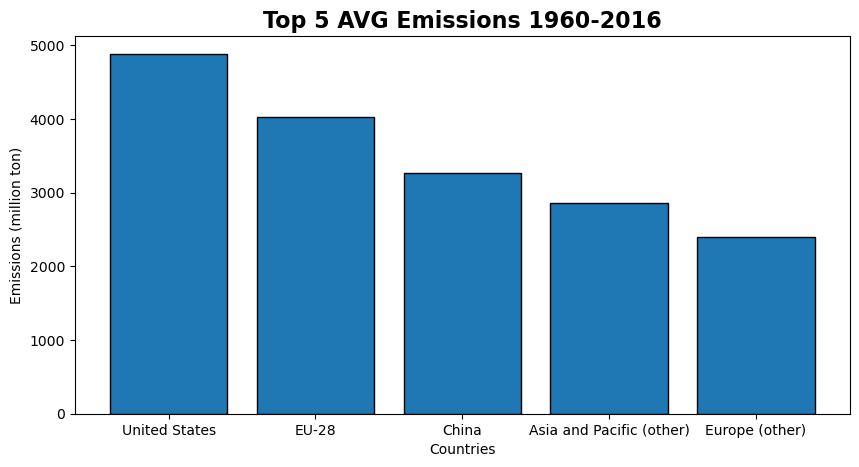

In [28]:
plt.figure(figsize=(10,5), dpi=100)

y_pos = np.arange(len(df_top["Co2"].tolist()[1:6]))
val_list = list(map(lambda x: x/1000000, df_top["Co2"].tolist()[1:6]))

plt.bar(y_pos, val_list, edgecolor="black")
plt.title("Top 5 AVG Emissions 1960-2016", fontdict={"fontweight":"bold", "fontsize":16})

plt.xticks(y_pos, df_top["Country"].tolist()[1:6])
plt.yticks

axes = plt.gca()
axes.ticklabel_format(axis="y", style="plain")

plt.ylabel("Emissions (million ton)")
plt.xlabel("Countries")

plt.show()

['United States', 'EU-28', 'China', 'Asia and Pacific (other)', 'Europe (other)']


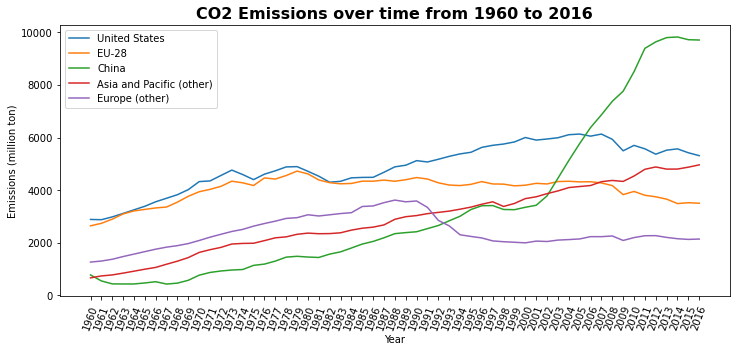

In [29]:
plt.figure(figsize=(12,5))

years = [i for i in range(1960,2016+1)]
countries = df_top["Country"].tolist()[1:6]
print(countries)

plt.title("CO2 Emissions over time from 1960 to 2016", fontdict={"fontweight":"bold", "fontsize":16})

for country in countries:
    
    filt = ((df["Year"] >= 1960) & (df["Country"] == country))
   
    plt.plot(years, [l/1000000 for l in df.loc[filt]["Co2"].tolist()], "-", label=country)

plt.xticks(years, rotation=70)


plt.xlabel("Year")
plt.ylabel("Emissions (million ton)")

plt.legend()

plt.show()

**Nhận xét**


Có thể thấy rằng Trung Quốc và Hoa Kỳ có lượng khí thải CO2 trung bình cao nhất từ năm 1960 đến năm 2016. Trong những năm gần đây thì khu vực Trung Quốc và Châu Á & Thái Bình Dương có lượng khí thải theo xu hướng tăng dần còn các khi vực còn lại có xu hướng giảm dần. Một số nguyên nhân có thể do
- Hoa Kỳ và Trung Quốc là 2 quốc gia thuộc top đầu về kinh tế, nên lượng khí thải do hoạt động sản xuất, khai thác diễn ra cao
- Châu Á & Thái Bình Dương và Trung Quốc có lượng khí thải tăng theo từng năm do đây là có thể nói khu vực đông dân nhất thế  giới và là khu vực nhiều tài nguyên nên hoạt động sản xuất, khai thác diễn ra mạnh mẽ

## Nhìn Lại Quá Trình Làm Đồ Án

### Các khó khăn nhóm gặp phải

- Khó khăn 1: Việc tìm chủ đề cho đồ án, lúc đầu nhóm em dự định chọn chủ đề về Covid-19 nhưng do thấy đây là vấn đề đang hot và nhiều nhóm sẽ thực hiện tránh đề trùng nên nhóm em chọn một chủ để khác về môi trường đây cũng là chủ đề  trên thế giới quan tâm và qua đồ án nhóm em cũng thấy tầm quan trọng của việc bảo vệ môi trường.
- Khó khăn 2: Tìm tập dữ liệu phù hợp cho chủ đề, các tập dữ liệu ban đầu em tìm thấy có 2 trường hợp:
    + Qúa phức tạp, có quá nhiều thuộc tính thuộc về  chuyên ngành khó hiểu cho người không có chuyên môn để nhận xét.
    + Quá đơn giản, có quá ít thuộc tính, không có thông tin gì để  tìm hiểu và đặt câu hỏi.


### Những dự định nếu có thời gian thêm

- Đưa ra thêm một số câu hỏi để trả lời một số vấn đề như liên hệ giữa lượng khí thải và dân số 
- Áp dụng các mô hình dự đoán trong tương lai để  